In [1]:
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk

In [2]:
# Download stopwords from NLTK
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
# Load the dataset
df = pd.read_csv('/content/BestBuy_NodeXL_tweets_data_cleaned.csv')

In [4]:
# Ensure the Text column is of type string and handle NaN values
df['Text'] = df['Text'].fillna('').astype(str)

In [5]:
# Define the function to get sentiment polarity
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

In [6]:
# Apply the get_sentiment function to the Text column and create a new Sentiment column
df['Sentiment'] = df['Text'].apply(get_sentiment)

In [7]:
# Convert the Sentiment column to numeric, coercing errors to NaN
df['Sentiment'] = pd.to_numeric(df['Sentiment'], errors='coerce')

In [8]:
# Drop rows with NaN values in the Sentiment column
df = df.dropna(subset=['Sentiment'])

In [9]:
# Count the number of positive, negative, and neutral sentiment tweets
num_positive_sentiments = len(df[df['Sentiment'] > 0])
num_negative_sentiments = len(df[df['Sentiment'] < 0])
num_neutral_sentiments = len(df[df['Sentiment'] == 0])

print("Number of positive sentiment tweets:", num_positive_sentiments)
print("Number of negative sentiment tweets:", num_negative_sentiments)
print("Number of neutral sentiment tweets:", num_neutral_sentiments)

Number of positive sentiment tweets: 557
Number of negative sentiment tweets: 94
Number of neutral sentiment tweets: 217


In [10]:
# Concatenate all the text data into a single string
all_text = ' '.join(df['Text'])

In [11]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_text = ' '.join([word for word in all_text.split() if word.lower() not in stop_words])

In [12]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', prefer_horizontal=0.9).generate(filtered_text)

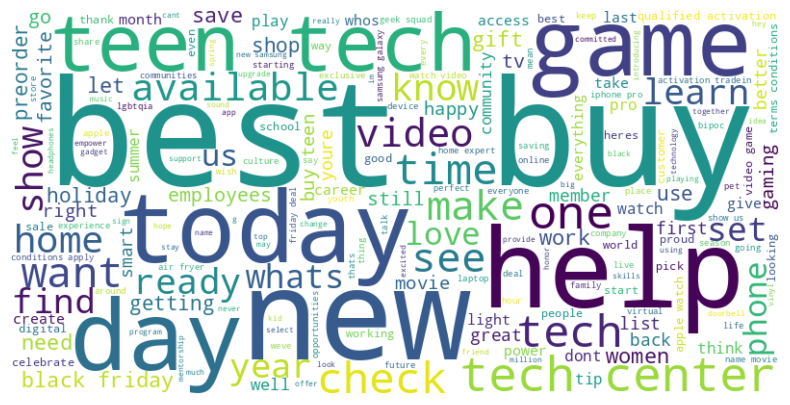

In [13]:
# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()